# Проект "Обучение с учителем: качество модели"

__Описание проекта.__ Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

__Бизнес-требования__ 
1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

2. Нужно собрать данные по клиентам по следующим группам:

Признаки, которые описывают коммуникацию сотрудников компании с клиентом.

Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.

Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.

Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

3. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.

4. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.

5. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

__Цель проекта__ Выделить сегменты постоянных покупателей и разработать для них персонализированные предложения с целью поддержания покупательской активности.

__Описание данных__ Данные представлены 4мя таблицами.

 *market_file.csv*  - Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

id — номер покупателя в корпоративной базе данных.

Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».

Тип сервиса — уровень сервиса, например «премиум» и «стандарт». Зависит от наличия определенной подписки у пользователя.

Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.

Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.

Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.

Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.

Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.

Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.

Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение 
последнего месяца.

Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.

Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта за последние 3 месяца.

Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

*market_money.csv* - Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

id — номер покупателя в корпоративной базе данных.

Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.

Выручка — сумма выручки за период в условных единицах.

*market_time.csv* - Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

id — номер покупателя в корпоративной базе данных.

Период — название периода, во время которого зафиксировано общее время.

минут — значение времени, проведённого на сайте, в минутах.

*money.csv* - Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

id — номер покупателя в корпоративной базе данных.

Прибыль — значение прибыли в условных единицах.

Ход проекта:

Шаг 1. Загрузка данных

Шаг 2. Предобработка данных

Шаг 3. Исследовательский анализ данных

Шаг 4. Объединение таблиц

Шаг 5. Корреляционный анализ

Шаг 6. Использование пайплайнов

Шаг 7. Анализ важности признаков

Шаг 8. Сегментация покупателей

Шаг 9. Общий вывод


## Загрузка данных

In [1]:
# установка библиотеки нужной версии
!pip install scikit-learn==1.6.1 -q
#импорт необходимых библиотек
import pandas as pd
#импортируем библиотеку matplotlib.pyplot для построения визуальных представлений данных
import matplotlib.pyplot as plt
#импортируем библиотеку для построения диаграммы размаха
import seaborn as sns
#импорт модуля регулярных выражений
import re 
# установим библиотеку для корреляционного анализа
!pip install phik
import phik
#импортируем библиотеку для работы с массивами
import numpy as np
# импортируйте функцию для разделения датасета на выборки
from sklearn.model_selection import train_test_split
# загружаем класс pipeline
from sklearn.pipeline import Pipeline
# загружаем классы для подготовки данных
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer
# загружаем функцию для работы с метриками
from sklearn.metrics import roc_auc_score
# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# импортируем методы для оценки качества классификации
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
# импортируем метод для построения матрицы ошибок
from sklearn.metrics import confusion_matrix

# импортируем библиотеку для оценки признаков
!pip install shap 
import shap

In [2]:
#настройка размера графиков
plt.rcParams["figure.figsize"] = (14,15)
sns.set_style('whitegrid')

#фиксация констант
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [3]:
#извлекаем данные из файлов
df_market_file = pd.read_csv('/datasets/market_file.csv',  sep = ',', decimal = '.')
df_market_money = pd.read_csv('/datasets/market_money.csv', sep = ',', decimal = '.')
df_market_time = pd.read_csv('/datasets/market_time.csv', sep = ',')
df_money = pd.read_csv('/datasets/money.csv', sep = ';', decimal = ',')
#выведем названия столбцов
print(df_market_file.columns)
print(df_market_money.columns)
print(df_market_time.columns)
print(df_money.columns)

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')
Index(['id', 'Период', 'Выручка'], dtype='object')
Index(['id', 'Период', 'минут'], dtype='object')
Index(['id', 'Прибыль'], dtype='object')


In [4]:
#просмотр информации о составе и типе данных
df_market_file.info()
df_market_money.info()
df_market_time.info()
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [5]:
#просмотр данных
display(df_market_file.head())
display(df_market_money.head())
display(df_market_time.head())
display(df_money.head())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Вывод по разделу:  данные в таблицах соответствуют описанию

## Предобработка данных

In [6]:
#приведение названий колонок датафреймов к snake_case
dfs = [ 
    df_market_file,
    df_market_money,
    df_market_time,
    df_money
] 

for df in dfs:
    df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).replace(' ', '_').lower() for i in df.columns]

In [7]:
#выведем названия столбцов
print(df_market_file.columns)
print(df_market_money.columns)
print(df_market_time.columns)
print(df_money.columns)

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')
Index(['id', 'период', 'выручка'], dtype='object')
Index(['id', 'период', 'минут'], dtype='object')
Index(['id', 'прибыль'], dtype='object')


In [8]:
#выполним поиск явных дубликатов
print(df_market_file.duplicated().sum())
print(df_market_money.duplicated().sum())
print(df_market_time.duplicated().sum())
print(df_money.duplicated().sum())

0
0
0
0


In [9]:
#выполним поиск неявных дубликатов
print(df_market_file.duplicated(subset=['id']).sum())
print(df_market_money.duplicated(subset=['id', 'период']).sum())
print(df_market_time.duplicated(subset=['id', 'период']).sum())
print(df_money.duplicated().sum())

0
0
0
0


In [10]:
#поиск неявных дубликатов в df_market_file (второй способ)
def dup(columns):
    unique_values = df_market_file[columns].unique()
    return unique_values

for i in list(df_market_file.select_dtypes(include='object').columns):
    print(dup(i))
   

['Снизилась' 'Прежний уровень']
['премиум' 'стандартт' 'стандарт']
['да' 'нет']
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


In [11]:
#исправим опечатки
df_market_file['тип_сервиса'] = df_market_file['тип_сервиса'].replace('стандартт', 'стандарт')
df_market_file['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [12]:
#поиск неявных дубликатов в df_market_time (второй способ)
for i in list(df_market_time.select_dtypes(include = 'object').columns):
    print(df_market_time[i].unique())

['текущий_месяц' 'предыдцщий_месяц']


In [13]:
#исправим опечатки
df_market_time['период'] = df_market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
df_market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

In [14]:
#поиск неявных дубликатов в df_market_money (второй способ)
for i in list(df_market_money.select_dtypes(include='object').columns):
    print(df_market_money[i].unique())

['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


In [15]:
#выполним поиск явных дубликатов после преобразования
print(df_market_file.duplicated().sum())
print(df_market_money.duplicated().sum())
print(df_market_time.duplicated().sum())
print(df_money.duplicated().sum())

0
0
0
0


In [16]:
#выполним поиск неявных дубликатов после преобразования
print(df_market_file.duplicated(subset = ['id']).sum())
print(df_market_money.duplicated(subset = ['id', 'период']).sum())
print(df_market_time.duplicated(subset = ['id', 'период']).sum())
print(df_money.duplicated().sum())

0
0
0
0


Вывод по разделу: Названия столбцов приведены к "змеиному регистру", найдены и исправлены опечатки, пропуски в данных отсутствуют, дубликаты отсутствуют.

## Исследовательский анализ данных

### Статистический анализ признаков для каждого датасета

In [17]:
#чтобы получить статистику в разрезе каждого клиента, сгруппируем их данные в датафреймах df_market_money и df_market_time, 
# так как данные в этих таблицах разбиты на периоды
df_market_money_gr = df_market_money.pivot_table(index = 'id', values = 'выручка', aggfunc = 'sum')
display(df_market_money_gr.head())
df_market_time_gr = df_market_time.pivot_table(index = 'id', values = 'минут', aggfunc = 'sum')
df_market_time_gr.head()

,выручка
id,
215348,3293.1
215349,14659.6
215350,15341.9
215351,17561.4
215352,16274.0


,минут
id,
215348,27
215349,22
215350,21
215351,24
215352,19


In [18]:
#выведем описание данных для числовых столбцов датафреймов
dfs = [ 
    df_market_file,
    df_market_money_gr,
    df_market_time_gr,
    df_money
] 

for df in dfs:
    col_name=df.select_dtypes(include='number').columns.tolist() #создаем список столбцов
    if 'id' in col_name:
        col_name.remove('id') #удаляем столбец с id
        
    display(df[col_name].describe()) #выводим описание данных в столбцах
    

,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


,выручка
count,1300.000000
mean,15077.088154
std,3301.835476
min,3293.100000
25%,13942.950000
50%,15071.500000
75%,16087.025000
max,117990.200000


,минут
count,1300.000000
mean,26.672308
std,6.698753
min,9.000000
25%,21.000000
50%,27.000000
75%,32.000000
max,45.000000


,прибыль
count,1300.000000
mean,3.996631
std,1.013722
min,0.860000
25%,3.300000
50%,4.045000
75%,4.670000
max,7.430000


По описанию данных отклонений не видно, кроме большого максимального значения выручки. Даллее посмотрим сколько таких клиентов и были ли они активны последние три месяца.

In [19]:
count_values = df_market_file.select_dtypes(include='object').value_counts()
print(count_values)

покупательская_активность  тип_сервиса  разрешить_сообщать  популярная_категория                
Прежний уровень            стандарт     да                  Товары для детей                        94
                                                            Домашний текстиль                       74
                                                            Техника для красоты и здоровья          72
                                                            Мелкая бытовая техника и электроника    71
Снизилась                  стандарт     да                  Товары для детей                        62
Прежний уровень            стандарт     да                  Косметика и аксесуары                   59
Снизилась                  стандарт     да                  Домашний текстиль                       51
Прежний уровень            стандарт     нет                 Товары для детей                        43
Снизилась                  премиум      да                  Косметика и аксесуа

Из числового описания данных трудно сделать какие-либо выводы. Построим графики.

### Построение графиков для признаков

Для числовых признаков построим гистограммы и диаграммы размаха, а для не числовых круговые диаграммы.

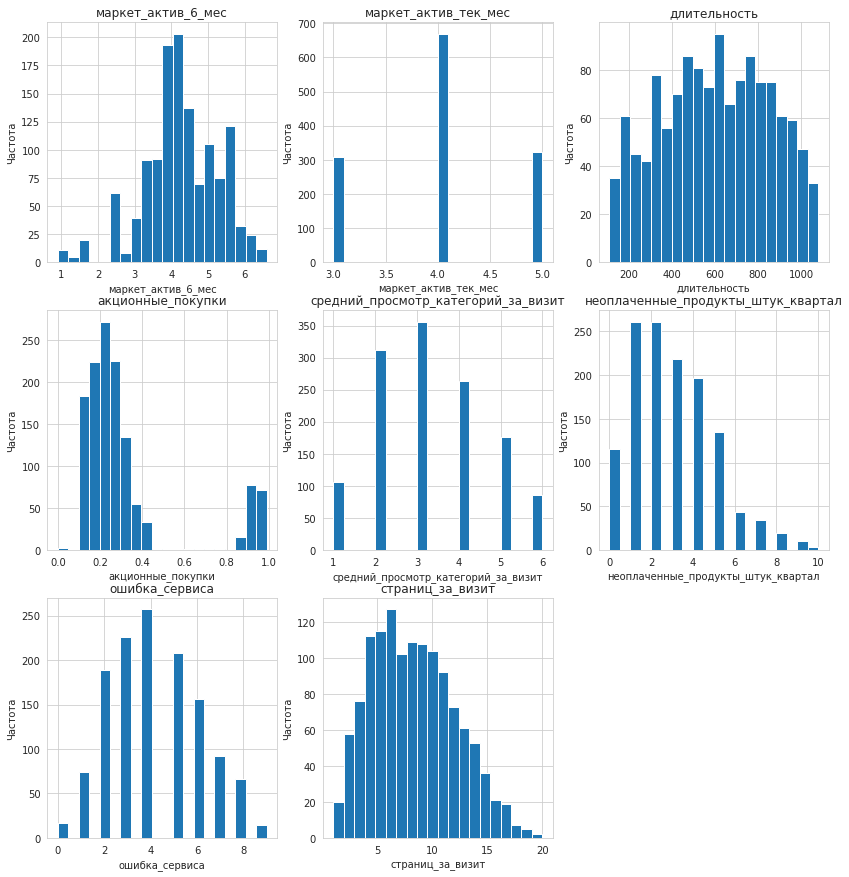

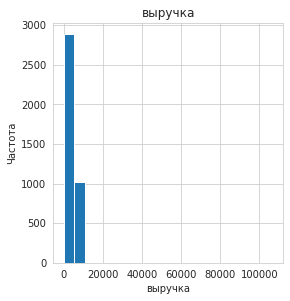

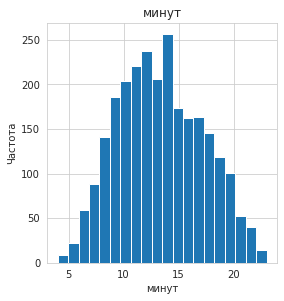

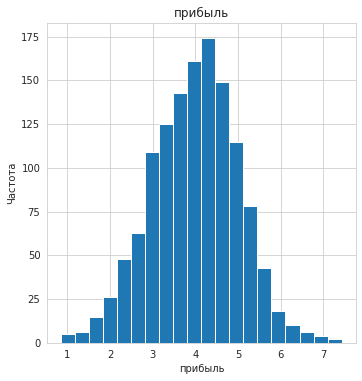

In [20]:
#посторим гистограммы для всех числовых столбцов для оценки распределения данных 

dfs = [ 
    df_market_file,
    df_market_money,
    df_market_time,
    df_money
] 

for df in dfs:    
    
    col_name=df.select_dtypes(include='number').columns.tolist() #создаем список столбцов
    if 'id' in col_name:
        col_name.remove('id') #удаляем столбец с id
    plt.figure(figsize=(14, 15))
    for i, column in enumerate(col_name):
        plt.subplot(3,3,i+1)
        df[column].hist(bins=20)
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Частота')
            
plt.tight_layout()
plt.show();

Из гистограмм видно, что часть признаков похожи на категориальные, распределение похоже на нормальное и на Пуассона, заметен выброс.

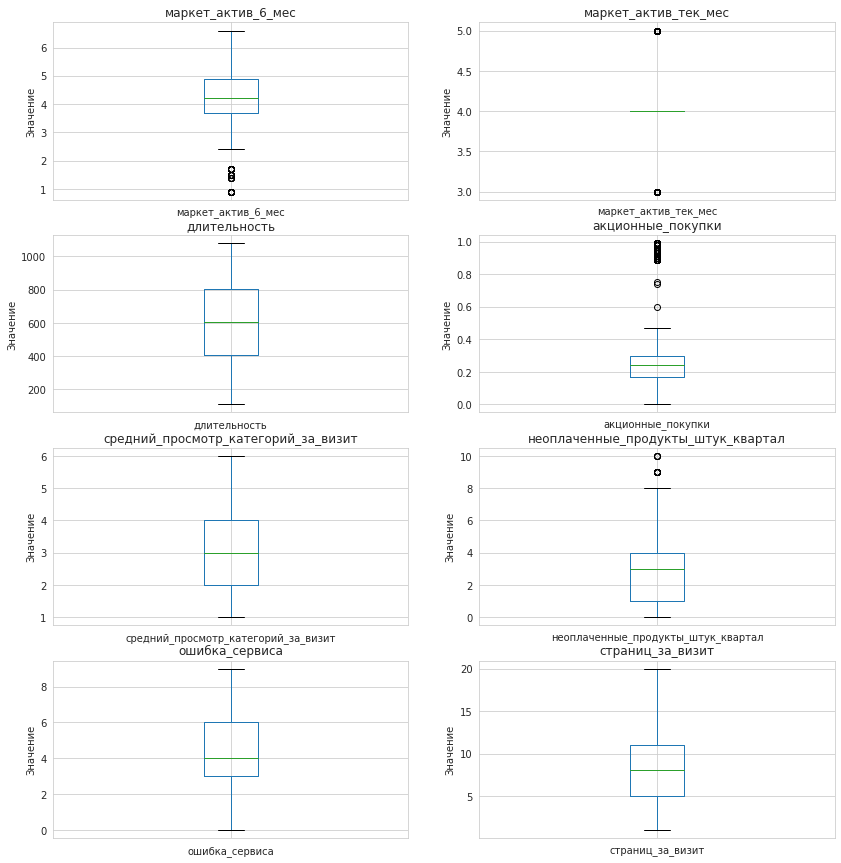

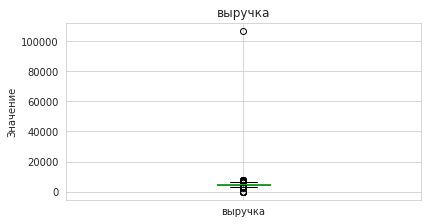

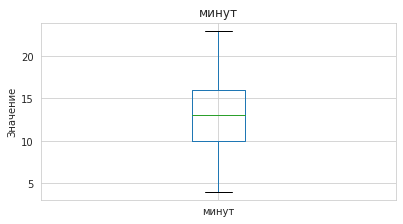

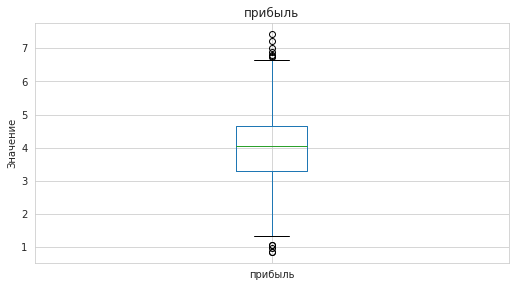

In [21]:
#для дополнительного анализа выбросов построим диаграмму размаха для всех числовых признаков

for df in dfs:    
    
    col_name=df.select_dtypes(include='number').columns.tolist()
    if 'id' in col_name:
        col_name.remove('id')
    plt.figure(figsize=(14, 15))
    for i, column in enumerate(col_name):
        plt.subplot(4,2,i+1)
        df.boxplot(column=column)
        plt.title(column)
       # plt.xlabel(column)
        plt.ylabel('Значение')
plt.tight_layout()
plt.show()

Наблюдаются выбросы у признака "выручка", расмотрим его детально

In [22]:
#отсортируем данные в датафрейме df_market_money
#df_market_money.sort_values(by='выручка', ascending=False)
df_market_money[df_market_money['id']==215380]

,id,период,выручка
96,215380,препредыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,106862.2


In [23]:
#клиент с выбросом всего один
#посмотрим данные по этому клиенту в других таблицах
display(df_market_file[df_market_file['id']==215380])
display(df_market_time[df_market_time['id']==215380])
df_money[df_money['id']==215380]

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
32,215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7


,id,период,минут
64,215380,предыдущий_месяц,12
65,215380,текущий_месяц,14


,id,прибыль
32,215380,3.88


Вывод: клиент конечно мог совершить в категории "Техника для красоты и здоровья" крупную покупку и возможно по акции, но в целом, такое поведение всему датасету не характерно и одной записью можно принебречь.

In [24]:
#удалим запись с выбросом из датафрейма и заново построим гистограмму и диаграмму размаха
df_market_money=df_market_money.loc[df_market_money['выручка'] != 106862.2]

In [25]:
df_market_money=df_market_money.reset_index(drop=True)

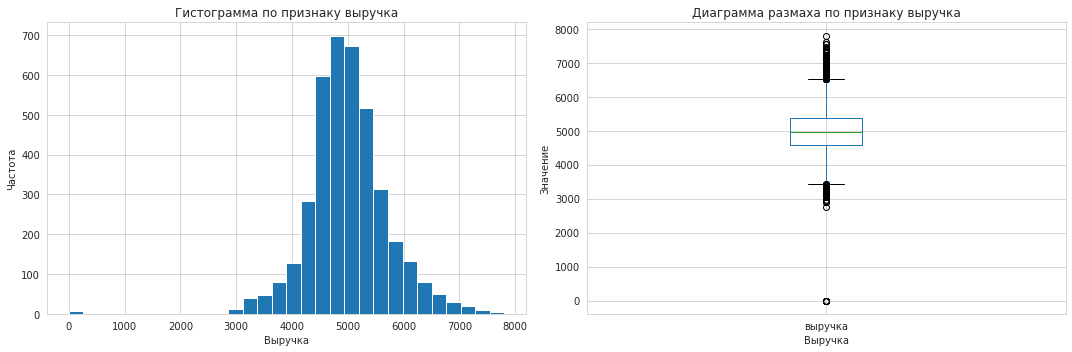

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5)) #создание фигуры и двух подграфиков

#построение гистограммы на первом подграфике
df_market_money['выручка'].hist(bins=30, ax=ax1)
ax1.set_title('Гистограмма по признаку выручка')
ax1.set_xlabel('Выручка')
ax1.set_ylabel('Частота')

#построение диаграммы размаха на втором подграфике
df_market_money.boxplot(column='выручка', ax=ax2)
ax2.set_title('Диаграмма размаха по признаку выручка')
ax2.set_xlabel('Выручка')
ax2.set_ylabel('Значение')

plt.tight_layout()
plt.show()

После удаления выброса стало видно, что данные по выручке распределяются нормально, при этом довольно много значений как с низкой выручкой, так и с высокой.

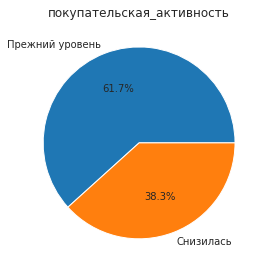

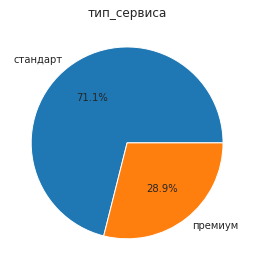

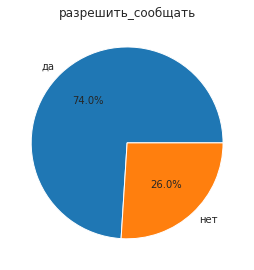

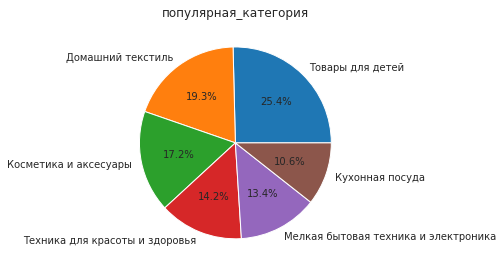

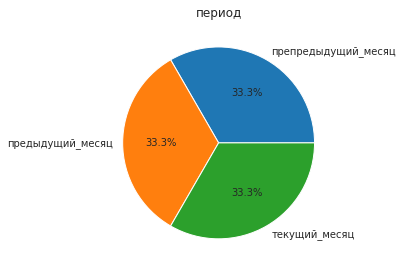

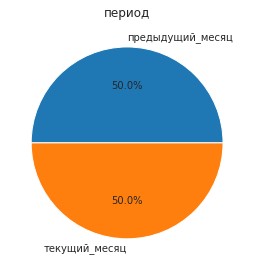

<Figure size 1008x1080 with 0 Axes>

In [27]:
#для категориальных признаков датафрейма построим круговые диаграммы
for df in dfs:    
    plt.figure(figsize=(14, 15))
    col_name=df.select_dtypes(include='object').columns.tolist()
    if 'id' in col_name:
        col_name.remove('id')
    
    
    for i, column in enumerate(col_name):
        plt.subplot(3, 2, i + 1)
        data = df[column].value_counts()
        plt.pie(data, labels=data.index, autopct='%1.1f%%')
        plt.title(column)
        plt.show()

По графикам категориальных признаков видно, что:
- покупательская способность снизилась у 38.3% клиентов;
- количество премиальных клиентов почти в 3 раза меньше клиентов со стандартной подпиской;
- почти в таком же соотношении распределены клиенты с подпиской на информирование и без, вторых меньше;
- самые популярные категории товаров это товары для детей и домашний текстиль;
- данные за периоды представлены в одинаковых пропорциях.

### Отбор клиентов с покупательской активностью не менее трёх месяцев

In [28]:
#выберем клиентов, которые не совершали покупки в последние три месяца
df_market_money_f = df_market_money.query('выручка == 0')
df_market_money_f

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


Мы получили id трех клиентов у которых покупки были только в двух месяцах из трех, по условиям задачи анализ требуется выполнять на клиентах, у которых были покупки не менее чем, в трех месяцах. Исключим клиентов с этими id из всех датафреймов.

In [29]:
#создаем список с клиентами для удаления
drop_id=df_market_money_f['id'].unique().tolist()
print(drop_id)

print('до', df_market_money.shape)
print('до',df_market_file.shape)
print('до',df_market_time.shape)
print('до',df_money.shape)

drop_id = [215348, 215357, 215359]
#удаляем строки с id из списка
for i in drop_id:
        df_market_money = df_market_money.drop(df_market_money[df_market_money['id'] == i].index)
        df_market_file = df_market_file.drop(df_market_file[df_market_file['id'] == i].index)
        df_market_time = df_market_time.drop(df_market_time[df_market_time['id'] == i].index)
        df_money = df_money.drop(df_money[df_money['id'] == i].index)
        
print('после', df_market_money.shape)
print('после',df_market_file.shape)
print('после',df_market_time.shape)
print('после',df_money.shape)

[215348, 215357, 215359]
до (3899, 3)
до (1300, 13)
до (2600, 3)
до (1300, 2)
после (3890, 3)
после (1297, 13)
после (2594, 3)
после (1297, 2)


__Вывод по разделу__

Благодаря проведенному исследовательскому анализу данных был обнаружен выброс в данных по выручке. Строка с выбросом была удалена. Необычного распределения у количественных признаков незамечено. Распределения похожи на нормальные и Пуассона. Часть признаков являются кандидатами на перевод в категориальную шкалу.Точки на диаграммах разброса можно считать приемлемыми значениями.

Клиенты с покупками в менее чем трех месяцах удалены из датафреймов.

## Объединение таблиц

Для объединения таблиц:
1. В таблицах df_market_money и df_market_time выделим колонки с периодами
2. Объединим птаблицы

In [30]:
#сгруппируем данные
df_market_money=df_market_money.pivot(index='id', columns='период', values='выручка').reset_index()
#переименуем столбцы
df_market_money.columns = ['id','выручка_предыдущий_месяц','выручка_препредыдущий_месяц', 'выручка_текущий_месяц']

In [31]:
df_market_money.head()

,id,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
0,215349,5216.0,4472.0,4971.6
1,215350,5457.5,4826.0,5058.4
2,215351,6158.0,4793.0,6610.4
3,215352,5807.5,4594.0,5872.5
4,215353,4738.5,5124.0,5388.5


In [32]:
df_market_money.value_counts()

id      выручка_предыдущий_месяц  выручка_препредыдущий_месяц  выручка_текущий_месяц
215349  5216.0                    4472.0                       4971.6                   1
216203  4444.0                    4519.0                       4639.0                   1
216221  5884.0                    4384.0                       7314.0                   1
216220  4709.0                    4427.0                       5083.4                   1
216219  5198.5                    5614.0                       4968.4                   1
                                                                                       ..
215782  5597.0                    5624.0                       5750.4                   1
215781  5029.0                    4900.0                       5270.8                   1
215780  5404.5                    4950.0                       5928.4                   1
215779  5949.0                    5142.0                       5379.6                   1
216647  4720.0 

In [33]:
#сгруппируем данные
df_market_time=df_market_time.pivot(index='id', columns='период', values='минут').reset_index()
#переименуем столбцы
df_market_time.columns = ['id','минут_предыдущий_месяц', 'минут_текущий_месяц']

In [34]:
df_market_time.head()

,id,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,12,10
1,215350,8,13
2,215351,11,13
3,215352,8,11
4,215353,10,10


In [35]:
#объединяем датафреймы по id
df_common = df_market_file.merge(df_market_money, on='id').merge(df_market_time, on='id') 
df_common

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1293,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1294,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1295,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


In [36]:
df_common.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   покупательская_активность            1297 non-null   object 
 2   тип_сервиса                          1297 non-null   object 
 3   разрешить_сообщать                   1297 non-null   object 
 4   маркет_актив_6_мес                   1297 non-null   float64
 5   маркет_актив_тек_мес                 1297 non-null   int64  
 6   длительность                         1297 non-null   int64  
 7   акционные_покупки                    1297 non-null   float64
 8   популярная_категория                 1297 non-null   object 
 9   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  ошибка_сервиса                

In [37]:
df_common.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_предыдущий_месяц               0
выручка_препредыдущий_месяц            0
выручка_текущий_месяц                  1
минут_предыдущий_месяц                 0
минут_текущий_месяц                    0
dtype: int64

In [38]:
#удалим запись с NAN
df_common[df_common['выручка_текущий_месяц'].isna()]
df_common = df_common.drop(df_common[df_common['id'] == 215380].index)
df_common.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_предыдущий_месяц               0
выручка_препредыдущий_месяц            0
выручка_текущий_месяц                  0
минут_предыдущий_месяц                 0
минут_текущий_месяц                    0
dtype: int64

Получили объединенный датафрейм с 1296 записями.

## Корреляционный анализ

Рассчитаем коэффициенты корреляции между всеми признаками и выведем их в виде тепловой карты.
Из-за присутствия и категориальных и колличественных признаков использовать метод Пирсона для расчета корреляции нельзя. 
Можно использовать метод phik.

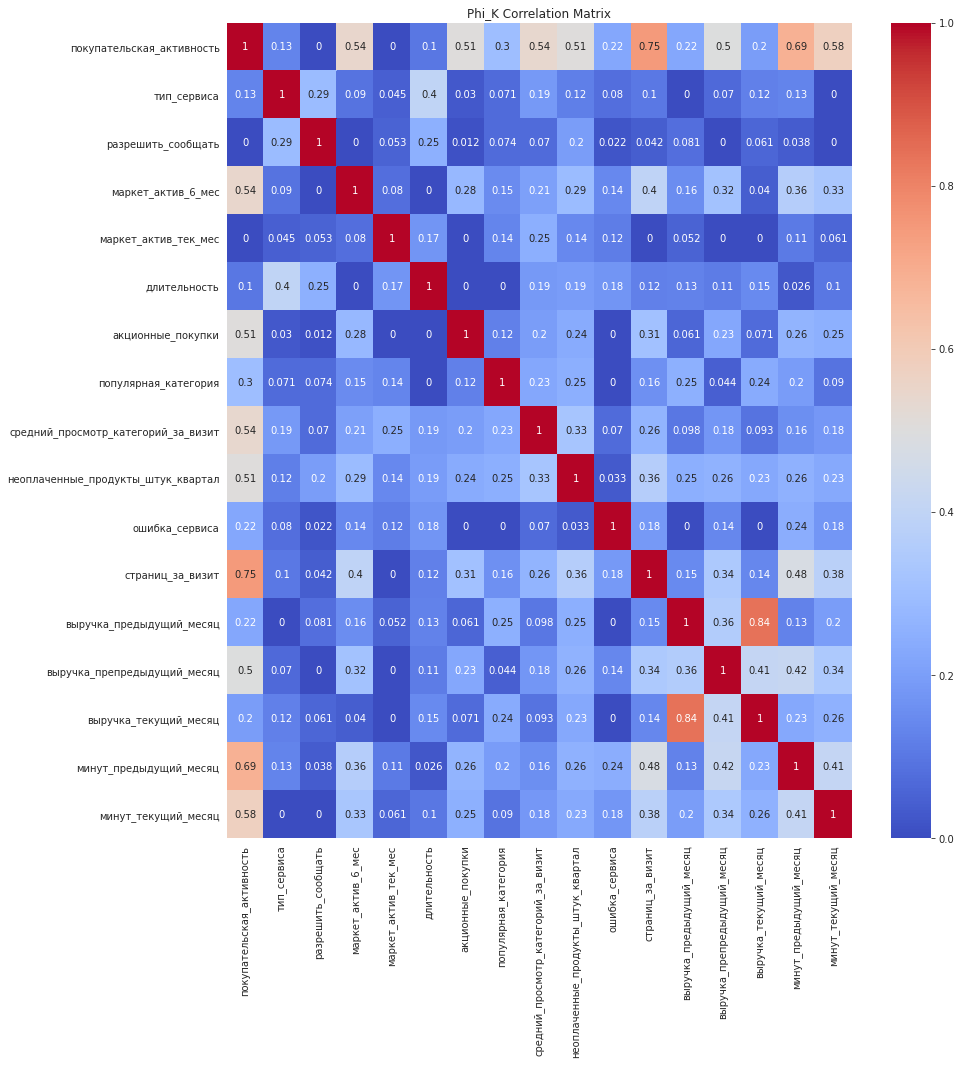

In [39]:
#исключим id
df_common_corr=df_common.drop(columns=['id'], axis=1)

#для метода нужен список с количественными признаками
num_columns = df_common_corr.select_dtypes(include='number').columns.tolist()

# Вычисление матрицы корреляции с использованием phik
corr_matrix = df_common_corr.phik_matrix(interval_cols = num_columns)

# Визуализация матрицы корреляции
#plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

По тепловой карте можно сделать следующие выводы:

- очень высоких корреляций (0.9 +) отсутствуют, скорее всего мультиколлинеарности нет.

- у целевого признака "Покупательская активность":

        - сильная связь(0.7+) с:
        
                   - количеством минут на сайте за предыдущий месяц,
                    - просмотренными страницами
                    
        - средняя связь(0.5+) с:
        
                    - количеством минут на сайте за текущий месяц,
                    - активность за 6 месяцев, 
                    - количество просмотренный категорий за визит,
                    - покупками по акции,
                    - неоплаченные продукты в корзине,
                    - выручкой в предыдущий месяц 

## Использование пайплайнов

In [40]:
df_common.head(10)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
5,215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,5685.0,4503.0,5869.6,11,12
6,215355,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,3263.0,4749.0,3772.6,12,10
7,215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4146.5,4433.0,4566.4,6,7
8,215358,Снизилась,стандарт,да,4.7,4,450,0.13,Домашний текстиль,4,2,6,4,3488.0,4727.0,4209.5,14,10
9,215360,Снизилась,премиум,да,3.9,3,623,0.35,Кухонная посуда,3,1,4,7,5304.5,5555.0,5834.9,9,6


In [41]:
#определим есть ли дисбаланс в данных, изучив распределение целевого признака, посчитав частоту появления каждого класса
print(df_common['покупательская_активность'].value_counts())

Прежний уровень    802
Снизилась          494
Name: покупательская_активность, dtype: int64


Перечислим особенности данных:

Целевой признак — покупательская активность. 

Два признака: разрешить_сообщать, популярная_категория — нужно кодировать с помощью OneHotEncoder.

Под порядковые категориальные данные больше всего подходит признак тип_сервиса его закодируем с помощью OrdinalEncoder.

Признак выручка_текущий_месяц нужно удалить из-за утечки целевого признака.

Количественные признаки - маркет_актив_6_мес, маркет_актив_тек_мес, длительность, акционные_покупки, средний_просмотр_категорий_за_визит, неоплаченные_продукты_штук_квартал, ошибка_сервиса, страниц_за_визит, минут_предыдущий_месяц, минут_текущий_месяц.

В данных по целевому признаку присутствует дисбаланс, целевой признак бинарный, поэтому в качестве метрики выберем ROC-AUC.

In [42]:
#cоздаем пайплайн, который выберет лучшую комбинацию модели и гиперпараметров
#разделяем выборку с отношением 0.25
X_train_all, X_test_all, y_train, y_test = train_test_split(
    df_common.drop(['покупательская_активность'], axis=1),
    df_common['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df_common['покупательская_активность'])

X_train_all.shape, X_test_all.shape

((972, 17), (324, 17))

In [43]:
#удалим id из выборок
X_test = X_test_all.drop(['id'], axis = 1)
X_train = X_train_all.drop(['id'], axis = 1)

In [44]:
# создаём списки с названиями признаков
ohe_columns = ['разрешить_сообщать', 'популярная_категория']
ord_columns = ['тип_сервиса']
num_columns = ['маркет_актив_6_мес', 
               'маркет_актив_тек_мес', 
               'длительность', 
               'акционные_покупки', 
               'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал',
               'ошибка_сервиса', 
               'страниц_за_визит', 
               'минут_предыдущий_месяц', 
               'минут_текущий_месяц',
               'выручка_текущий_месяц',
              'выручка_препредыдущий_месяц',
              'выручка_предыдущий_месяц']

In [45]:
X_train

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
507,стандарт,да,5.5,4,510,0.15,Мелкая бытовая техника и электроника,2,4,7,16,5170.5,4347.0,6014.2,20,6
10,стандарт,да,5.1,4,199,0.23,Техника для красоты и здоровья,4,5,2,3,6400.0,4597.0,3789.7,11,13
533,стандарт,да,4.3,5,997,0.17,Мелкая бытовая техника и электроника,5,1,3,11,4113.0,4626.0,3798.4,13,10
1213,стандарт,да,5.6,4,342,0.94,Кухонная посуда,2,7,5,8,4930.0,5269.0,4766.2,14,19
364,премиум,да,3.6,5,873,0.39,Товары для детей,3,2,2,5,3716.0,4691.0,4600.0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,стандарт,да,4.0,3,432,0.16,Косметика и аксесуары,4,1,2,13,5646.5,4685.0,6609.8,17,22
826,стандарт,да,3.5,4,666,0.21,Мелкая бытовая техника и электроника,2,2,2,8,4667.0,5132.0,4394.0,21,18
584,стандарт,да,5.3,4,352,0.13,Товары для детей,1,7,3,10,5371.5,5274.0,5586.0,15,19
512,стандарт,нет,4.6,4,900,0.16,Мелкая бытовая техника и электроника,5,0,8,8,4862.0,4985.0,4885.4,18,20


In [46]:
#переведём строковые значения целевого признака в порядковые числа
from sklearn.preprocessing import LabelEncoder
#объявляем экземпляр класса
label_encoder = LabelEncoder()

# обучаем модель и трансформируйте целевой признак из тренировочной выборки 
y_train = label_encoder.fit_transform(y_train)

# трансформируем целевой признак из тестовой выборки
y_test = label_encoder.transform(y_test)



In [47]:
#смотрим результат
print(pd.DataFrame(y_train, y_train, columns=['LabelEncoder']).head() )
print(pd.DataFrame(y_test, y_test, columns=['LabelEncoder']).head() )
label_encoder.classes_

   LabelEncoder
0             0
1             1
0             0
0             0
1             1
   LabelEncoder
0             0
1             1
0             0
1             1
1             1


array(['Прежний уровень', 'Снизилась'], dtype=object)

In [48]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline([
        
        (    'ohe', 
            OneHotEncoder(sparse_output=False, handle_unknown='error', drop='first')
        )
])


In [49]:
ohe_pipe.fit(X_train[ohe_columns])
encoder_col_names = ohe_pipe['ohe'].get_feature_names_out()
encoder_col_names

array(['разрешить_сообщать_нет',
       'популярная_категория_Косметика и аксесуары',
       'популярная_категория_Кухонная посуда',
       'популярная_категория_Мелкая бытовая техника и электроника',
       'популярная_категория_Техника для красоты и здоровья',
       'популярная_категория_Товары для детей'], dtype=object)

In [50]:
# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline([
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум']
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
       (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
])

In [51]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough',
    force_int_remainder_cols=False
)

In [52]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
            ])
print(pipe_final)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                       

In [53]:
#создаем словарь моделей 
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__max_features': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(probability= True, random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },
    ]

In [54]:
#запускаем автоматический подбор 
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
    )

In [55]:
#обучим модель на тренировочной выборке
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(force_int_remainder_cols=False,
                                                                remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse_output=False))]),
                                                                               ['разрешить_сообщать',
                                                                                'популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_before_ord',
                                                                                                SimpleImputer(stra...
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [56]:
print('Лучшая модель и её параметры:\n\n' , randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                 

In [57]:
# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = randomized_search.predict_proba(X_test)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred).round(2)}')


Метрика ROC-AUC на тестовой выборке: 0.92


Вывод по разделу:

В задаче классификации лучшей моделью определена Логистическая регрессия с гиперпараметрами С=2, penalty=l1, random_state=42, solver=liblinear. Она делает предсказания с точность 89%
Для модели выбрана метрика ROC-AUC так как задача является задачей бинарной классификации и в данных присутствует дисбаланс.
Метрика ROC-AUC на тестовой выборке показала 92%

## Анализ важности признаков

1. Пайплайн pipe_final применяется к выборке X_train.
2. Затем обученный на тренировочных данных pipe_final применяется к выборке X_test.
3. Для обеих выборок создаём датафрейм с обозначением названия признаков после подготовки.

In [58]:
X_train_p = randomized_search.best_estimator_.named_steps['preprocessor'].transform(X_train)

In [59]:
X_test_p = randomized_search.best_estimator_.named_steps['preprocessor'].transform(X_test)

In [60]:
feature_names = randomized_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
feature_names

array(['ohe__разрешить_сообщать_нет',
       'ohe__популярная_категория_Косметика и аксесуары',
       'ohe__популярная_категория_Кухонная посуда',
       'ohe__популярная_категория_Мелкая бытовая техника и электроника',
       'ohe__популярная_категория_Техника для красоты и здоровья',
       'ohe__популярная_категория_Товары для детей', 'ord__тип_сервиса',
       'num__маркет_актив_6_мес', 'num__маркет_актив_тек_мес',
       'num__длительность', 'num__акционные_покупки',
       'num__средний_просмотр_категорий_за_визит',
       'num__неоплаченные_продукты_штук_квартал', 'num__ошибка_сервиса',
       'num__страниц_за_визит', 'num__минут_предыдущий_месяц',
       'num__минут_текущий_месяц', 'num__выручка_текущий_месяц',
       'num__выручка_препредыдущий_месяц',
       'num__выручка_предыдущий_месяц'], dtype=object)

In [61]:
X_res = pd.DataFrame(X_test_p, columns=feature_names)
X_res.head()

,ohe__разрешить_сообщать_нет,ohe__популярная_категория_Косметика и аксесуары,ohe__популярная_категория_Кухонная посуда,ohe__популярная_категория_Мелкая бытовая техника и электроника,ohe__популярная_категория_Техника для красоты и здоровья,ohe__популярная_категория_Товары для детей,ord__тип_сервиса,num__маркет_актив_6_мес,num__маркет_актив_тек_мес,num__длительность,num__акционные_покупки,num__средний_просмотр_категорий_за_визит,num__неоплаченные_продукты_штук_квартал,num__ошибка_сервиса,num__страниц_за_визит,num__минут_предыдущий_месяц,num__минут_текущий_месяц,num__выручка_текущий_месяц,num__выручка_препредыдущий_месяц,num__выручка_предыдущий_месяц
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.561404,0.5,0.506263,0.045455,1.0,0.1,0.444444,0.578947,0.611111,0.684211,0.105243,0.520128,0.272145
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.087719,0.5,0.587683,0.943182,0.4,0.6,0.111111,0.263158,0.333333,0.263158,0.280120,0.356550,0.165347
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.421053,0.5,0.383090,0.022727,0.6,0.2,0.888889,0.473684,0.833333,0.368421,0.709644,0.298403,0.641789
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.456140,0.0,0.977035,0.272727,0.6,0.3,0.555556,0.263158,0.222222,0.263158,0.793541,0.571885,0.933283
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.807018,0.5,0.027140,1.000000,0.0,0.2,0.333333,0.315789,0.555556,0.736842,0.598151,0.225559,0.552833


In [62]:
explainer = shap.LinearExplainer(randomized_search.best_estimator_.named_steps['models'], X_train_p)

In [63]:
shap_values = explainer(X_res)

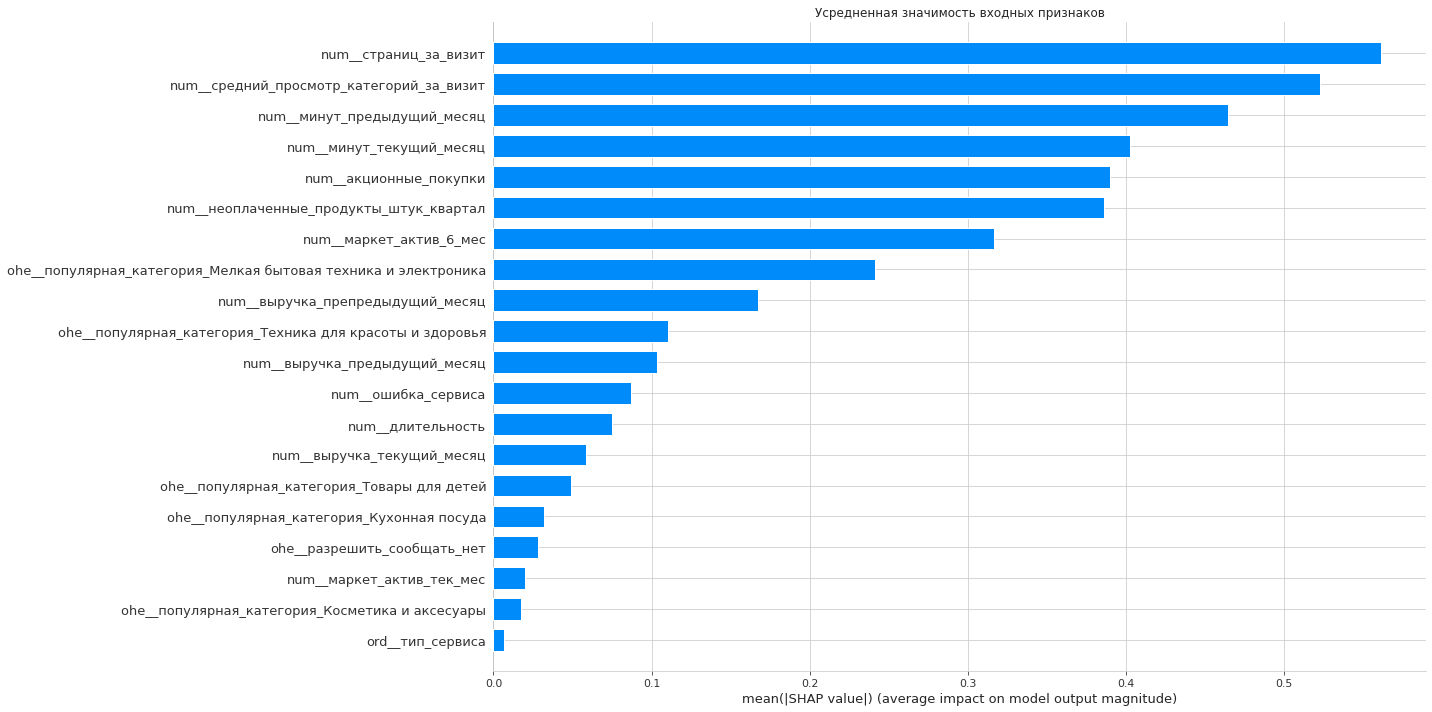

None

In [64]:
plt.title('Усредненная значимость входных признаков')
plt.xlabel('средние значения')
display(shap.summary_plot(
    shap_values, plot_type='bar', feature_names=feature_names,
                  plot_size=(20,10)
                         ))


Выводы о значимости признаков:

- признаки мало значимые для модели:
  - тип_сервиса
  
  - разрешить_сообщать
  
  - популярная_категория_Косметика и аксессуары
  
  - популярная_категория_Кухонная посуда
  
- признаки сильнее всего влияющие на целевой признак:

    - страниц_за_визит
    
    - минут_предыдущий_месяц
    
    - средний_просмотр_категорий_за_визит
    
    - маркет_актив_6_мес
    
    - акционные_покупки
    
  Из всех категорий покупок больше всего клиентов интересует Мелкая_бытовая техника и электроника
  
  
 При моделировании и принятии бизнес-решений можно рекомендовать уделять больше внимания признакам сильнее всего влияющим на целевой, разрабатывать функции сайта направленные на удержание внимания покупателя, предлагать больше акции и расширить ассортимент предлагаемой мелкой бытовой техники и электроники.

## Сегментация покупателей

Выполним сегментацию покупателей, используя результаты моделирования и данные о прибыльности покупателей.

In [65]:
#получим результаты моделирования в едином датафрейме result_mod (Прежний уровень - 0, Снизилось - 1)
result_mod1 = X_test_all
result_mod1['предсказания'] = randomized_search.predict(X_test)
result_mod1['вероятность'] = y_test_pred 
result_mod2 = X_train_all
result_mod2['предсказания'] = y_train
y_train_pred = randomized_search.predict_proba(X_train)[:,1]
result_mod2['вероятность'] = y_train_pred
result_mod = pd.concat([result_mod1,result_mod2],axis=0)
result_mod.head()
result_mod.shape

(1296, 19)

In [66]:
result_mod.head()

,id,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,предсказания,вероятность
810,216161,стандарт,да,4.1,4,606,0.15,Техника для красоты и здоровья,6,1,4,12,3973.0,4912.0,3289.2,16,17,0,0.012406
303,215654,премиум,нет,1.4,4,684,0.94,Товары для детей,3,6,1,6,3548.0,4656.0,4170.7,11,9,1,0.987425
956,216307,премиум,да,3.3,4,488,0.13,Домашний текстиль,4,2,8,10,5444.0,4565.0,6335.8,20,11,0,0.112124
150,215501,премиум,да,3.5,3,1057,0.35,Домашний текстиль,4,3,5,6,6604.0,4993.0,6758.7,9,9,1,0.787934
583,215934,стандарт,нет,5.5,4,147,0.99,Мелкая бытовая техника и электроника,1,2,3,7,5090.0,4451.0,5773.8,15,18,1,0.513192


In [67]:
#добавим в единый датафрейм данные о прибыльности
result_mod = pd.merge(result_mod, df_money, on = 'id', how = 'left')
result_mod.sort_values(by='вероятность', ascending=True)

,id,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,предсказания,вероятность,прибыль
104,215775,стандарт,нет,5.0,4,157,0.15,Мелкая бытовая техника и электроника,5,0,5,13,4028.0,4934.0,3372.8,19,16,0,0.002845,1.38
687,216073,стандарт,нет,5.4,4,226,0.28,Мелкая бытовая техника и электроника,6,0,7,14,5104.0,5155.0,5189.8,9,20,0,0.003938,3.17
305,216410,премиум,да,4.8,3,939,0.11,Домашний текстиль,6,1,7,12,4273.0,4465.0,4236.6,21,23,0,0.004256,4.74
1208,215823,стандарт,нет,5.0,5,234,0.23,Техника для красоты и здоровья,5,1,7,13,5153.0,5600.0,4895.6,21,15,1,0.004303,5.42
145,216624,стандарт,да,5.4,5,806,0.17,Домашний текстиль,6,1,8,11,5565.5,5096.0,6102.4,22,19,0,0.004370,3.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,215634,премиум,да,2.6,4,780,0.99,Косметика и аксесуары,2,7,3,6,6407.5,4780.0,6775.4,7,8,1,0.996576,2.97
296,215668,премиум,да,4.4,4,343,0.94,Товары для детей,2,9,2,2,5567.5,4723.0,5293.2,6,9,1,0.997207,4.49
291,215701,стандарт,да,0.9,4,212,0.95,Домашний текстиль,2,5,4,2,4685.5,4444.0,5161.3,9,7,1,0.997716,5.05
180,215538,премиум,да,1.5,5,788,0.89,Товары для детей,1,4,4,4,6013.5,4641.0,6900.1,8,4,1,0.997722,2.79


In [68]:
#посмотрим описание данных
result_mod['прибыль'].describe()

count    1296.000000
mean        3.997701
std         1.011198
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

In [69]:
#разделим клиентов на группы с высокой вероятность снижения покупательской активности и высоким доходом и всех остальных
df_segment1 = result_mod[(result_mod['прибыль'] > 4.67) & (result_mod['вероятность'] > 0.5)]
df_segment1.head(10)

,id,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,предсказания,вероятность,прибыль
21,215484,премиум,нет,2.9,5,448,0.23,Товары для детей,4,2,6,3,5059.0,4267.0,5018.7,5,7,1,0.901915,5.64
48,215737,стандарт,да,0.9,4,225,0.36,Косметика и аксесуары,2,4,2,3,5126.0,4679.0,5291.1,9,10,1,0.979107,4.80
52,215390,стандарт,да,3.1,4,152,0.33,Косметика и аксесуары,6,4,2,5,4254.0,4549.0,4612.8,8,12,1,0.655887,5.70
55,215604,стандарт,нет,3.1,5,458,0.99,Косметика и аксесуары,1,5,3,4,4449.0,4308.0,4459.4,8,10,1,0.995446,4.86
66,215351,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,1,0.784406,4.87
84,215473,стандарт,нет,4.1,3,336,0.22,Домашний текстиль,2,7,2,3,4246.5,4224.0,3987.8,8,13,1,0.954763,4.69
109,215908,премиум,нет,4.0,4,845,0.12,Домашний текстиль,2,7,6,5,4396.0,4933.0,4991.4,10,12,1,0.859676,5.26
118,215832,стандарт,нет,4.1,3,206,0.99,Товары для детей,4,4,3,4,5065.5,4662.0,5545.2,14,10,1,0.888201,5.30
121,215399,премиум,да,4.1,4,1007,0.30,Товары для детей,4,5,3,6,3857.0,4529.0,4900.9,13,10,1,0.680674,5.01
133,215563,премиум,да,3.9,5,956,0.35,Косметика и аксесуары,2,2,6,7,6036.5,4985.0,6114.5,10,9,1,0.797692,6.88


Мы получили 102 клиента.

### Графическое и аналитическое исследование группы покупателей

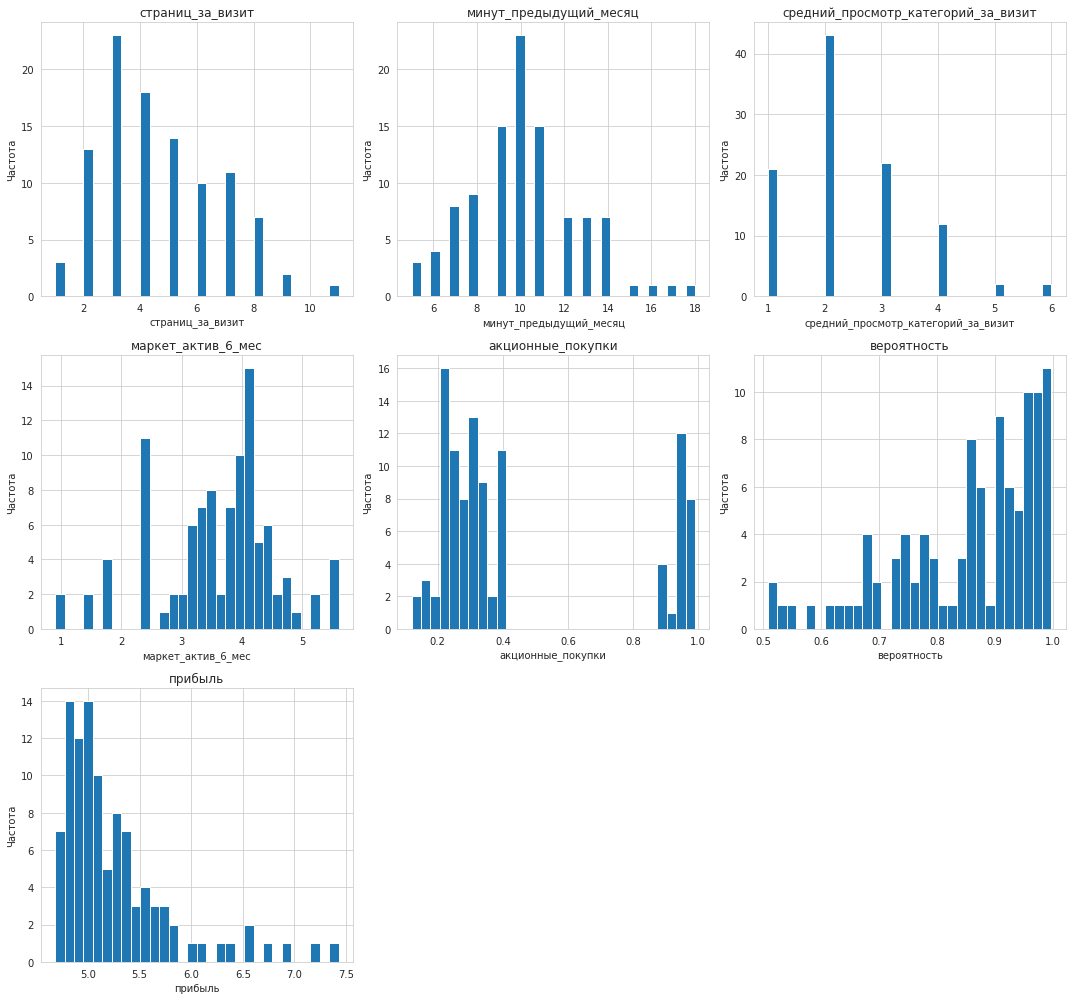

In [70]:
#ранее мы выделили признаки, которые больше всего влияют на потребительскую активность, построим по ним графики
feature_importent = ['страниц_за_визит', 
                    'минут_предыдущий_месяц', 
                    'средний_просмотр_категорий_за_визит', 
                    'маркет_актив_6_мес',
                    'акционные_покупки',
                    'популярная_категория',
                    'вероятность', 
                    'прибыль']

df_segment_f_i = df_segment1[feature_importent]

num_columns = df_segment_f_i.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(15, 14))
for i, column in enumerate(num_columns):
    # создаем подграфики для каждого признака
        plt.subplot(3, 3, i + 1) 

        df_segment_f_i[column].hist(bins=30)
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Частота')
        
plt.tight_layout()
plt.show()

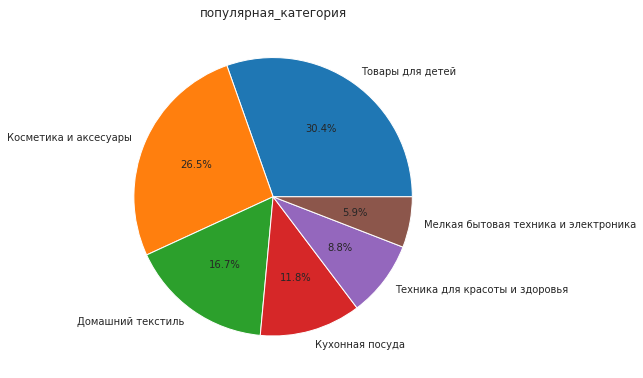

In [71]:
#для категориальных признаков датафрейма построим круговые диаграммы
plt.figure(figsize=(14, 10))
    
cat_columns = df_segment_f_i.select_dtypes(include=['object']).columns.tolist()

for i, column in enumerate(cat_columns):
    plt.subplot(1, 2, i + 1)
    data = df_segment_f_i[column].value_counts()
    
    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    plt.title(column)
plt.tight_layout()
plt.show()

Для дополнительно исследования были выбраны клиенты по следующим критериям:

    - прибыль от покупок попадает в третий квартиль от всех значений, т.е. клиенты по которым доход самый высокий для компании.
    - вероятность снижения покупательской активности больше стандартного для логистической регрессии порогового значения 0.5.
    
На графиках явно видна заинтересованность у данного сегмента клиентов в покупках по акциям, при этом любимыми категориями являются Товары для детей - 30.4%, Косметика и аксесуары - 26.5% , Домашний текстиль - 16.7%. Покупатели в основном проводят 10 минут на сайте и просматривают не больше 3х страниц.

Для повышения покупательской активности данного сегмента можно предложить адаптировать сайт с целью показывать таким клиентам на первых страницах товары интересующих их категорий, а так же товары из этих категорий продаваемых в рамках акций, это должно способствовать увеличению количества просмотренных страниц и вероятности покупки.


## Общий вывод

В рамках данной задачи требовалось создать модель, которая позволит прогнозировать уровень покупательской активности клиентов и в случае выявления тенденции к снижению, позволять принимать своевременные меры для сохранения покупательской активности на текущем уровне.

Для решения поставленной задачи была подобрана лучшая модель, на основе имеющихся данных, из нескольких вариантов. Ей оказалась Логистическая регрессия предсказывающая результат с точность 89%

На этапе подготовки данных для поиска модели была выполнены:
 - предобработка данных представленных 4мя таблицами, найдены и исправлены опечатки, сделаны проверки пропусков и дубликатов,
 
 - выполнен исследовательский анализ в ходе которого составлено описание особенностей клиентов сайта:
 
             - покупательская способность снизилась у 38.3% клиентов;
             - количество премиальных клиентов почти в 3 раза меньше клиентов со стандартной подпиской;
             - почти в таком же соотношении распределены клиенты с подпиской на информирование и без, вторых меньше;
             - самые популярные категории товаров это товары для детей и домашний текстиль;
             
 - выполнен корреляционный анализ в ходе которого выявлены признаки сильно влияющие на покупательскую активность:

                - количеством минут на сайте за предыдущий месяц,
                - просмотренными страницами.
                
- по результатам работы лучшей модели повыполнен анализ важности признаков для выборки в целом:

                 - признаки мало значимые для предсказания покупательской активности:
                     - тип подписки на сервис,
                     - отправка уведомлений,
                     - категории Косметика и аксессуары и Кухонная посуда

                 - признаки сильнее всего влияющие на предсказания покупательской активности:
                   - количество просмотренных страниц за визит,
                   - количество минут проведенных на сайте за прошлый месяц,
                   - количество категорий просмотренных за визит,
                   - маркетинговые коммуникации за 6 месяцев,
                   - Покупки со время акций
                   - Категория Мелкая бытовая техника и электроника

Общие рекомендации для бизнеса.

При моделировании и принятии бизнес-решений можно рекомендовать уделять больше внимания признакам сильнее всего влияющим на целевой, разрабатывать функции сайта направленные на удержание внимания покупателя, предлагать больше акции и расширить ассортимент предлагаемой мелкой бытовой техники и электроники.


Рекомендации для отдельных категорий.
Для сохранения покупательской активности клиентов приносящих высокий доход сайту, можно рекомендовать адаптировать страницы под данную категорию показывать больше акций на товары категории Товары для детей, Домашний текстиль, Косметика и аксесуары 